In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
flights = pd.read_csv('data/flights_clean.csv')
flights

,airline,day,day_of_week,departure_delay,destination_airport,destination_latitude,destination_longitude,distance,month,origin_airport,...,scheduled_arrival,scheduled_departure,scheduled_time,state_destination,state_origin,taxi_in,taxi_out,day_of_year,origin_temperature,destination_temperature
0,AS,1,4,-11.0,SEA,47.44898,-122.30931,1448,1,ANC,...,270,5,205.0,WA,AK,4.0,21.0,1,35.2,32.9
1,AS,1,4,-4.0,SEA,47.44898,-122.30931,1448,1,ANC,...,309,45,204.0,WA,AK,4.0,17.0,1,35.2,32.9
2,DL,1,4,-14.0,SEA,47.44898,-122.30931,1448,1,ANC,...,315,45,210.0,WA,AK,4.0,25.0,1,35.2,32.9
3,AS,1,4,-15.0,SEA,47.44898,-122.30931,1448,1,ANC,...,393,115,218.0,WA,AK,11.0,17.0,1,35.2,32.9
4,AS,1,4,-11.0,SEA,47.44898,-122.30931,1448,1,ANC,...,400,140,200.0,WA,AK,8.0,15.0,1,35.2,32.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4031914,EV,27,5,77.0,ROA,37.32547,-79.97543,357,11,ATL,...,648,565,83.0,VA,GA,3.0,9.0,331,59.7,49.4
4031915,EV,27,5,-6.0,ROA,37.32547,-79.97543,357,11,ATL,...,985,902,83.0,VA,GA,5.0,21.0,331,59.7,49.4
4031916,DL,27,5,-1.0,ROA,37.32547,-79.97543,357,11,ATL,...,1162,1079,83.0,VA,GA,6.0,22.0,331,59.7,49.4
4031917,EV,19,6,88.0,ABE,40.65236,-75.44040,692,12,ATL,...,934,821,113.0,PA,GA,3.0,22.0,353,37.8,35.6


In [3]:
flights.iloc[0]

airline                           AS
day                                1
day_of_week                        4
departure_delay                -11.0
destination_airport              SEA
destination_latitude        47.44898
destination_longitude     -122.30931
distance                        1448
month                              1
origin_airport                   ANC
origin_latitude             61.17432
origin_longitude          -149.99619
scheduled_arrival                270
scheduled_departure                5
scheduled_time                 205.0
state_destination                 WA
state_origin                      AK
taxi_in                          4.0
taxi_out                        21.0
day_of_year                        1
origin_temperature              35.2
destination_temperature         32.9
Name: 0, dtype: object

In [4]:
pre_y = flights.departure_delay

In [5]:
pre_X = flights.drop(columns=['departure_delay', 'airline', 'destination_airport',
                              'origin_airport', 'state_destination', 'state_origin'])

In [6]:
X, X_test, y, y_test = train_test_split(pre_X, pre_y)

In [7]:
scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)

In [8]:
alphas = 10**np.linspace(10,-2,200)*0.5

In [9]:
# Find ridge coeffs for all lambda values
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(Xstd, y)
    coefs.append(ridge.coef_)

Text(0, 0.5, 'Standardized coefficient')

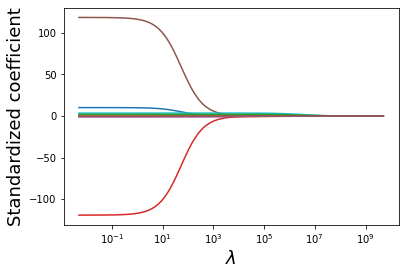

In [10]:
# Visualize shrinking regression coefficients with lambda increase
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')

In [11]:
# Cross validation to find optimal lambda
alphas = 10**np.linspace(4,-2,200)*0.5
ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
ridgecv.fit(Xstd, y)

#Optimal value of the tuning parameter - lambda
ridgecv.alpha_

0.049424795233127934

Text(0, 0.5, 'Cross-validation error')

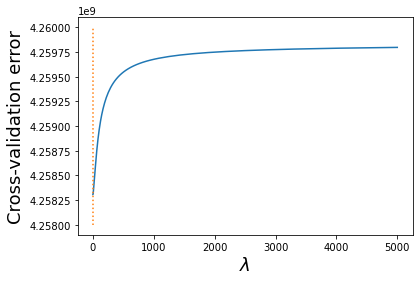

In [48]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(ridgecv.alphas,ridgecv.cv_values_.sum(axis=0))
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[4e9+2e8+5e7+8e6,4e9+2e8+6e7],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

Text(0, 0.5, 'Standardized coefficient')

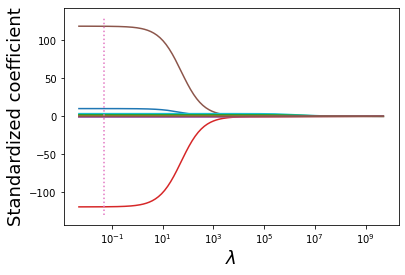

In [22]:
# Visualize with the optimal lambda
alphas = 10**np.linspace(10,-2,200)*0.5
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[-130,130],':')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')

In [14]:
Xtest_std = scaler.transform(X_test)

In [15]:
#Using the developed ridge regression model to predict on test data
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(Xstd, y)
pred=ridge.predict(Xtest_std)

In [16]:
#RMSE on test data
np.sqrt(((pred-y_test)**2).mean())

37.05149835069889

In [17]:
y_test.std()

37.42650259349151

In [18]:
#Checking the coefficients of the ridge regression model
ridge.coef_

array([ 1.01035195e+01, -6.98881334e-01, -2.19298833e-01,  4.39768353e-01,
       -8.41920651e-01,  1.18388997e+02, -6.55136742e-01,  1.86475111e-01,
        1.40473979e+00,  3.50592914e+00,  1.51757755e+00,  5.20546221e-01,
        2.02380514e+00, -1.19054687e+02, -8.28793259e-01, -1.12397317e-01])

In [19]:
#R-squared on train data for the ridge regression model
r2_score(ridge.predict(Xstd),y)

-48.66100087360677

In [20]:
#R-squared on test data for the ridge regression model
r2_score(pred,y_test)

-47.44280450232143